# Exploring Covid-19 

Let's look at the trends in Covid-19 confirmed cases and deaths over time, and among different states.

### First, we import the usual modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### We have data for both the running totals and the daily totals.  Let's load them both.

In [2]:
total_data = pd.read_csv('../data/covid_confirmed_and_deaths_US_by_state_total_2021.csv')
daily_data = pd.read_csv('../data/covid_confirmed_and_deaths_US_by_state_daily_2021.csv')

In [3]:
total_data

,Date,State,Population,Confirmed,Deaths
0,1/22/20,Alabama,4903185,0,0
1,1/22/20,Alaska,740995,0,0
2,1/22/20,American Samoa,0,0,0
3,1/22/20,Arizona,7278717,0,0
4,1/22/20,Arkansas,3017804,0,0
...,...,...,...,...,...
31889,7/24/21,Virginia,8535519,688300,11500
31890,7/24/21,Washington,7614893,466235,6078
31891,7/24/21,West Virginia,1792147,165702,2936
31892,7/24/21,Wisconsin,5822434,682077,8240


### Convert the Date to a datetime, and change that to be the index

In [4]:
total_data['timestamp'] = pd.to_datetime(total_data['Date'])
daily_data['timestamp'] = pd.to_datetime(total_data['Date'])

In [5]:
total_data.head()

,Date,State,Population,Confirmed,Deaths,timestamp
0,1/22/20,Alabama,4903185,0,0,2020-01-22
1,1/22/20,Alaska,740995,0,0,2020-01-22
2,1/22/20,American Samoa,0,0,0,2020-01-22
3,1/22/20,Arizona,7278717,0,0,2020-01-22
4,1/22/20,Arkansas,3017804,0,0,2020-01-22


In [6]:
total_data.index = total_data['timestamp']
total_data = total_data.drop(columns='timestamp')
total_data = total_data.drop(columns='Date')

daily_data.index = daily_data['timestamp']
daily_data = daily_data.drop(columns='timestamp')
daily_data = daily_data.drop(columns='Date')


In [7]:
total_data.head()
daily_data.head()

,State,Population,Confirmed,Deaths
timestamp,,,,
2020-01-22,Alabama,4903185,0,0
2020-01-22,Alaska,740995,0,0
2020-01-22,American Samoa,0,0,0
2020-01-22,Arizona,7278717,0,0
2020-01-22,Arkansas,3017804,0,0


### Get the total numbers and the daily numbers for the state of Illinois

In [8]:
il_total_deaths = total_data[total_data['State'] == "Illinois"]
il_total_deaths

,State,Population,Confirmed,Deaths
timestamp,,,,
2020-01-22,Illinois,12671821,0,0
2020-01-23,Illinois,12671821,0,0
2020-01-24,Illinois,12671821,1,0
2020-01-25,Illinois,12671821,1,0
2020-01-26,Illinois,12671821,1,0
...,...,...,...,...
2021-07-20,Illinois,12671821,1403508,25816
2021-07-21,Illinois,12671821,1404466,25825
2021-07-22,Illinois,12671821,1406459,25831


In [9]:
il_daily_deaths = daily_data[(daily_data['State'] == "Illinois")]
il_daily_deaths

,State,Population,Confirmed,Deaths
timestamp,,,,
2020-01-22,Illinois,12671821,0,0
2020-01-23,Illinois,12671821,0,0
2020-01-24,Illinois,12671821,1,0
2020-01-25,Illinois,12671821,0,0
2020-01-26,Illinois,12671821,0,0
...,...,...,...,...
2021-07-20,Illinois,12671821,745,6
2021-07-21,Illinois,12671821,958,9
2021-07-22,Illinois,12671821,1993,6


### Plot the daily confirmed cases for Illinois

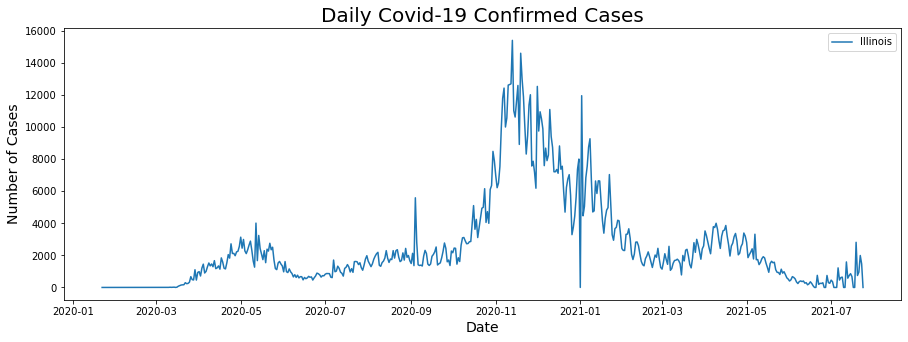

In [10]:
plt.plot(il_daily_deaths.index, il_daily_deaths['Confirmed'], label="Illinois")

plt.legend()

plt.title("Daily Covid-19 Confirmed Cases", fontsize=20)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Cases", fontsize=14);

fig = plt.gcf()
fig.set_size_inches(15, 5) 

### This is a bit messy.  Let's plot the rolling 7-day average.

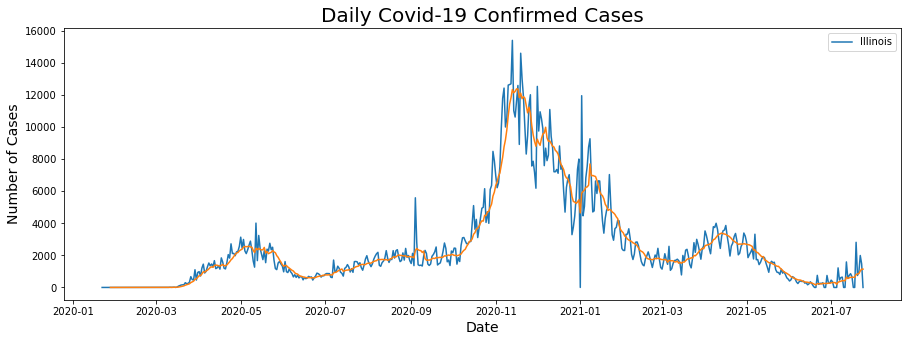

In [11]:
plt.plot(il_daily_deaths.index, il_daily_deaths['Confirmed'], label="Illinois")

plt.plot(il_daily_deaths['Confirmed'].rolling(7).mean())


plt.legend()

plt.title("Daily Covid-19 Confirmed Cases", fontsize=20)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Cases", fontsize=14);

fig = plt.gcf()
fig.set_size_inches(15, 5) 

### To compare Illinois to another state, repeat the process for a different state.  

By making the variable `state2` we can easily chnage the state in one spot and not have to change it the code that follows. We just call "state2".

In [31]:
# Use a variable for the other state's name, 
# so we can easily change it out later to compare different states.

state2 = "New York"
state2_daily_deaths = daily_data[daily_data['State'] == state2]

### Add state2 to the same plot as the Illinois numbers

We can use the same technique for the window size of the rolling mean.

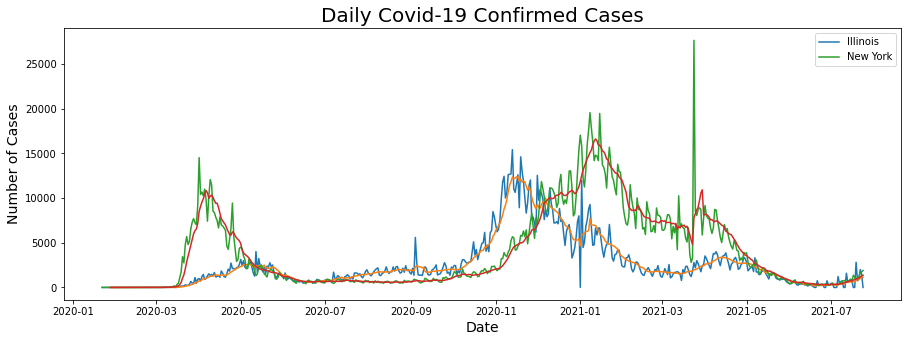

In [32]:
plt.plot(il_daily_deaths.index, il_daily_deaths['Confirmed'], label="Illinois")

window_size = 7

plt.plot(il_daily_deaths['Confirmed'].rolling(window_size).mean())

# add state2
plt.plot(state2_daily_deaths.index, state2_daily_deaths['Confirmed'], label=state2)

# add a label and plot for rolling mean for state2
plt.plot(state2_daily_deaths['Confirmed'].rolling(window_size).mean())


plt.legend()

plt.title("Daily Covid-19 Confirmed Cases", fontsize=20)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Cases", fontsize=14);

fig = plt.gcf()
fig.set_size_inches(15, 5) 

### We can do the same thing for deaths, by changing 'Confirmed' to 'Deaths' in the plot lines.

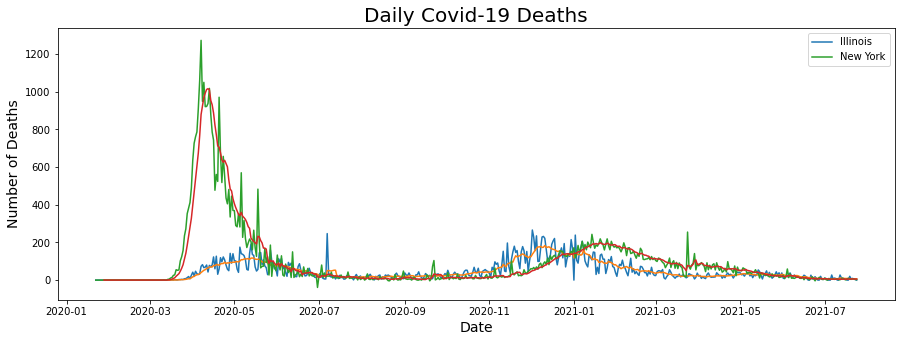

In [33]:
plt.plot(il_daily_deaths.index, il_daily_deaths['Deaths'], label="Illinois")

window_size = 7

plt.plot(il_daily_deaths['Deaths'].rolling(window_size).mean())

# add state2
plt.plot(state2_daily_deaths.index, state2_daily_deaths['Deaths'], label=state2)

# add a label and plot for rolling mean for state2
plt.plot(state2_daily_deaths['Deaths'].rolling(window_size).mean())


plt.legend()

plt.title("Daily Covid-19 Deaths", fontsize=20)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Deaths", fontsize=14);

fig = plt.gcf()
fig.set_size_inches(15, 5) 